# Data Visualisation CMP020L013  Assessment Report 
## Data Pre-processing and Cleaning

In [1]:
#importing libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
from scipy import stats

In [2]:
#importing the dataset for analysis
df = pd.read_csv("Strawberry_Greenhouse.csv")

In [3]:
# Fixing column name typos
df.rename(columns={
    'temparature': 'temperature',
    'irTemparature': 'irTemperature'
}, inplace=True)


### Handling Wrong DateTime Format

In [4]:
def parse_uk_datetime(dt_str):
    """Parse UK format dates with flexible handling of:
    - With/without leading zeros
    - With/without seconds
    - Various separators (/ or -)
    """
    dt_str = str(dt_str).strip()
    
    # Standardize separators
    dt_str = dt_str.replace('-', '/').replace('.', '/')
    
    # Try formats with seconds first
    try:
        return datetime.strptime(dt_str, '%d/%m/%Y %H:%M:%S')
    except ValueError:
        pass
    
    try:
        return datetime.strptime(dt_str, '%d/%m/%y %H:%M:%S')
    except ValueError:
        pass
    
    # Then try without seconds
    try:
        return datetime.strptime(dt_str, '%d/%m/%Y %H:%M')
    except ValueError:
        pass
    
    try:
        return datetime.strptime(dt_str, '%d/%m/%y %H:%M')
    except ValueError:
        pass
    
    # Handle single digit day/month without separators (e.g., 2/5/2023)
    try:
        return datetime.strptime(dt_str, '%d/%m/%Y %H:%M')
    except ValueError:
        pass
    
    return pd.NaT

# Apply the parser
df['DateTime'] = df['EnqueuedTimeUtc'].apply(parse_uk_datetime)

# Check results
print(f"Failed conversions: {df['DateTime'].isna().sum()}")
print("Date range:", df['DateTime'].min(), df['DateTime'].max())

Failed conversions: 0
Date range: 2023-02-16 13:41:57 2023-12-22 09:25:57


In [ ]:
# Instead of dropping the "EnqueuedTimeUtc" column, List all columns you want to keep
columns_to_keep = ['DateTime', 'deviceId', 'humidity', 'temperature', 'irTemperature']
df = df[columns_to_keep]
df

,DateTime,deviceId,humidity,temperature,irTemperature
0,2023-02-16 13:41:57,290EC1B,83,14,10
1,2023-02-16 13:41:57,290EF53,83,14,12
2,2023-02-16 13:41:58,290F190,88,13,12
3,2023-02-16 13:41:59,290F39C,84,13,11
4,2023-02-16 13:41:59,290F362,89,12,11
...,...,...,...,...,...
370714,2023-12-22 09:14:15,290F362,68,13,14
370715,2023-12-22 09:17:57,2908E26,70,13,13
370716,2023-12-22 09:18:15,290F362,67,13,14
370717,2023-12-22 09:21:57,2908E26,70,13,13


In [6]:
# Ensure there's no missing value
df.isnull().sum()

DateTime         0
deviceId         0
humidity         0
temperature      0
irTemperature    0
dtype: int64

In [7]:
# Get the sample of device IDs to understand their format
print("Sample device IDs:")
print(df['deviceId'].head(10).values)

# Check the string length distribution
print("\nDevice ID length distribution:")
print(df['deviceId'].str.len().value_counts())

Sample device IDs:
['290EC1B' '290EF53' '290F190' '290F39C' '290F362' '290ED74' '2908E26'
 '2909460' '290EAD5' '2908BE4']

Device ID length distribution:
deviceId
7    370719
Name: count, dtype: int64


# Handling Data Duplicates Values

In [9]:
# Check how many exact data duplicates are present
duplicates = df[df.duplicated(keep=False)]
print(f"Total exact duplicates: {len(duplicates)}")
display(duplicates)

Total exact duplicates: 18


,DateTime,deviceId,humidity,temperature,irTemperature
43268,2023-10-01 05:58:00,290F362,89,17,17
43273,2023-10-01 05:58:00,290F362,89,17,17
43276,2023-10-01 06:01:00,2908E30,89,16,17
43277,2023-10-01 06:01:00,2908E30,89,16,17
43282,2023-10-01 06:02:00,290F362,89,17,17
43287,2023-10-01 06:02:00,290F362,89,17,17
43290,2023-10-01 06:05:00,2908E30,89,16,17
43291,2023-10-01 06:05:00,2908E30,89,16,17
43293,2023-10-01 06:06:00,290F362,89,17,17
43301,2023-10-01 06:06:00,290F362,89,17,17


In [10]:
## Remove all duplicate rows but keep the first occurrence
df_clean = df.drop_duplicates()

# Verifying removal
print(f"Removed {len(df) - len(df_clean)} duplicates")
print(f"New DataFrame shape: {df_clean.shape}")

df_clean

Removed 9 duplicates
New DataFrame shape: (370710, 5)


,DateTime,deviceId,humidity,temperature,irTemperature
0,2023-02-16 13:41:57,290EC1B,83,14,10
1,2023-02-16 13:41:57,290EF53,83,14,12
2,2023-02-16 13:41:58,290F190,88,13,12
3,2023-02-16 13:41:59,290F39C,84,13,11
4,2023-02-16 13:41:59,290F362,89,12,11
...,...,...,...,...,...
370714,2023-12-22 09:14:15,290F362,68,13,14
370715,2023-12-22 09:17:57,2908E26,70,13,13
370716,2023-12-22 09:18:15,290F362,67,13,14
370717,2023-12-22 09:21:57,2908E26,70,13,13


### Detecting and Removing Outliers in temeperature, humidity and irTemperature

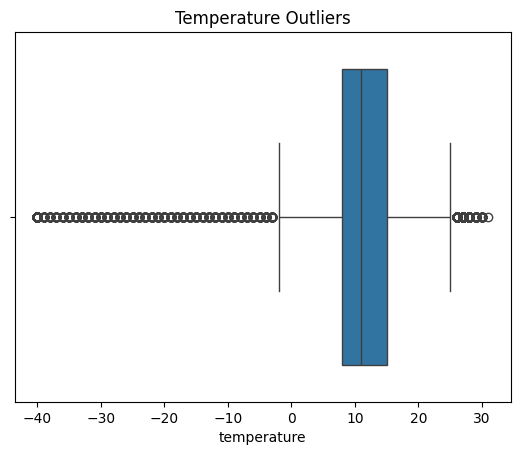

In [29]:
#Show Temperature outliers
sns.boxplot(x=df['temperature'])
plt.title('Temperature Outliers')
plt.show()

In [30]:
print("Original shape:", df.shape)
print("Duplicates removed:", df.duplicated().sum())


Original shape: (370719, 5)
Duplicates removed: 9


In [31]:
# Removing 0°C (unusual sensor detection)
print(f"Initial rows: {len(df)}") 

df = df.loc[df['temperature'] != 0].copy() if (df['temperature'] == 0).any() else df.copy()
print(f"After removing 0°C: {len(df)}")

# calculate Z-scores
df.loc[:, 'zscore'] = np.abs(
    (df['temperature'] - df['temperature'].mean()) / 
    df['temperature'].std()
)

# Remove outliers
threshold = 2.5
df_clean = df.loc[df['zscore'] <= threshold].copy()
print(f"Final cleaned: {len(df_clean)}")

Initial rows: 370719
After removing 0°C: 327517
Final cleaned: 324360


In [32]:
df_clean = df[df['zscore'] <= 2.5]

<Axes: ylabel='temperature'>

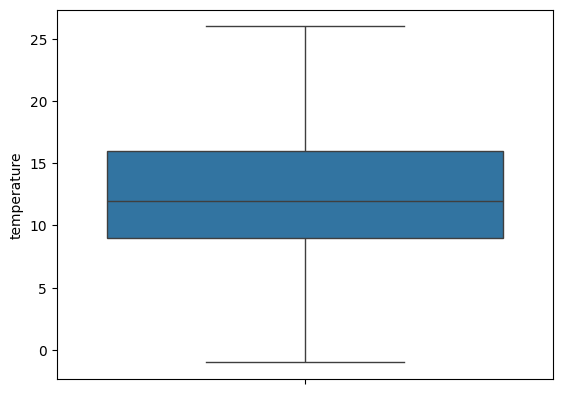

In [33]:
sns.boxplot(df_clean['temperature'])

In [ ]:
# Temperature range
df_clean = df[df['zscore'] <= 2.5]
print(f"New temperature range: {df_clean['temperature'].min()}°C to {df_clean['temperature'].max()}°C")
print(f"New mean: {df_clean['temperature'].mean():.2f}°C")

New temperature range: -1°C to 26°C
New mean: 12.46°C


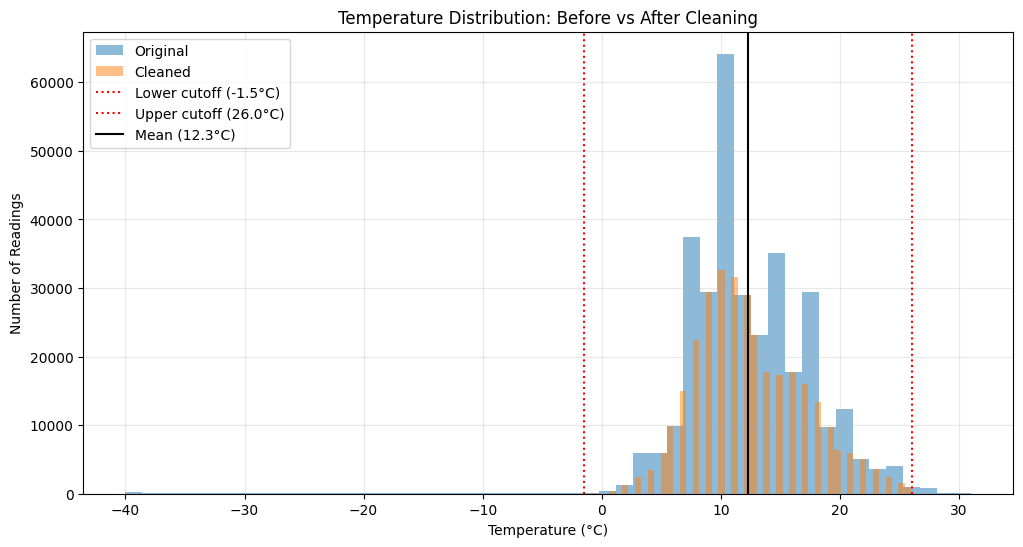

In [ ]:
# Temperature distribution chart showing results Before and after cleaning
plt.figure(figsize=(12,6))

# Calculate statistics
mean_temp = df['temperature'].mean()
std_temp = df['temperature'].std()
lower_cut = mean_temp - 2.5*std_temp
upper_cut = mean_temp + 2.5*std_temp

# Plot histograms graph
plt.hist(df['temperature'], bins=50, alpha=0.5, label='Original')
plt.hist(df_clean['temperature'], bins=50, alpha=0.5, label='Cleaned')

# Adding reference lines
plt.axvline(lower_cut, color='red', linestyle=':', label=f'Lower cutoff ({lower_cut:.1f}°C)')
plt.axvline(upper_cut, color='red', linestyle=':', label=f'Upper cutoff ({upper_cut:.1f}°C)')
plt.axvline(mean_temp, color='black', linestyle='-', label=f'Mean ({mean_temp:.1f}°C)')

# Formatting
plt.xlabel('Temperature (°C)')
plt.ylabel('Number of Readings')
plt.title('Temperature Distribution: Before vs After Cleaning')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

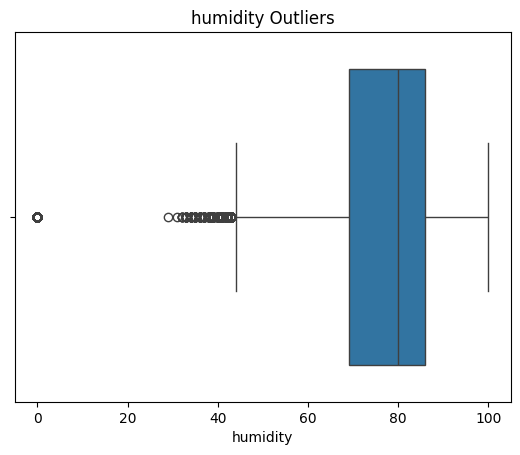

In [15]:
# Show Humidity Outliers
sns.boxplot(x=df['humidity'])
plt.title('humidity Outliers')
plt.show()

In [17]:
# Eliminating Outliers
# Calculate IQR for the 'humidity' column
Q1 = df['humidity'].quantile(0.25)
Q3 = df['humidity'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Capping -> change the outlier values to upper and lower limit values
df_clean_humidity = df.copy()
df_clean_humidity['humidity'] = df_clean_humidity['humidity'].astype(float)
df_clean_humidity.loc[(df_clean_humidity['humidity']> upper_limit),'humidity'] = upper_limit
df_clean_humidity.loc[(df_clean_humidity['humidity']< lower_limit),'humidity'] = lower_limit

<Axes: ylabel='humidity'>

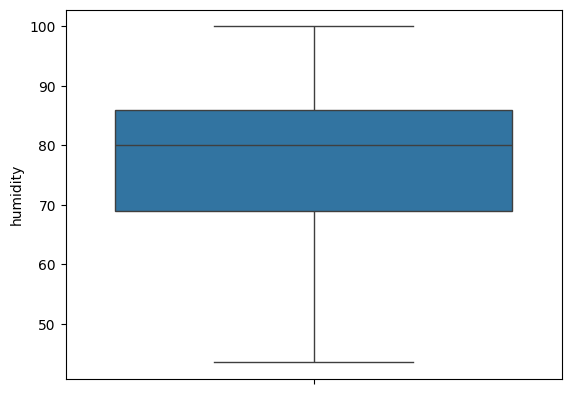

In [18]:
sns.boxplot(df_clean_humidity['humidity'])

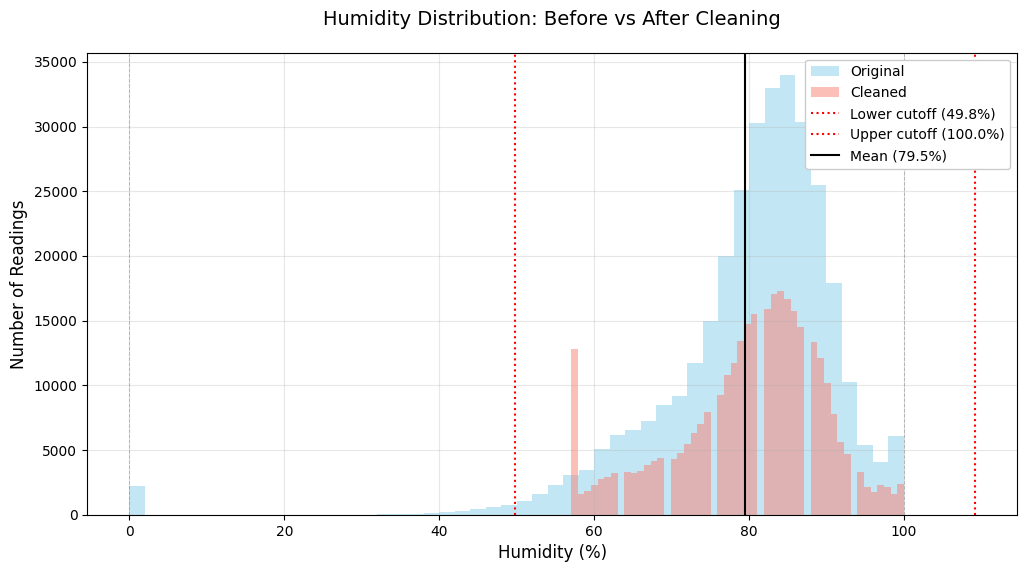

In [ ]:
# Humidity distribution chart showing results Before and after cleaning
plt.figure(figsize=(12,6))

# Calculate statistics for humidity
mean_humidity = df['humidity'].mean()
std_humidity = df['humidity'].std()
lower_cut = mean_humidity - 2.5*std_humidity
upper_cut = mean_humidity + 2.5*std_humidity

# Plot histograms
plt.hist(df['humidity'], bins=50, alpha=0.5, label='Original', color='skyblue')
plt.hist(df_clean_humidity['humidity'], bins=50, alpha=0.5, label='Cleaned', color='salmon')

# Add reference lines
plt.axvline(lower_cut, color='red', linestyle=':', linewidth=1.5, 
           label=f'Lower cutoff ({max(lower_cut,0):.1f}%)') 
plt.axvline(upper_cut, color='red', linestyle=':', linewidth=1.5, 
           label=f'Upper cutoff ({min(upper_cut,100):.1f}%)') 
plt.axvline(mean_humidity, color='black', linestyle='-', 
           label=f'Mean ({mean_humidity:.1f}%)')

# Formatting
plt.xlabel('Humidity (%)', fontsize=12)
plt.ylabel('Number of Readings', fontsize=12)
plt.title('Humidity Distribution: Before vs After Cleaning', fontsize=14, pad=20)
plt.legend(loc='upper right', framealpha=1)
plt.grid(True, alpha=0.3)

# Add physical bounds (0-100%) as vertical lines
plt.axvline(0, color='gray', linestyle='--', alpha=0.5, linewidth=0.7)
plt.axvline(100, color='gray', linestyle='--', alpha=0.5, linewidth=0.7)

plt.show()

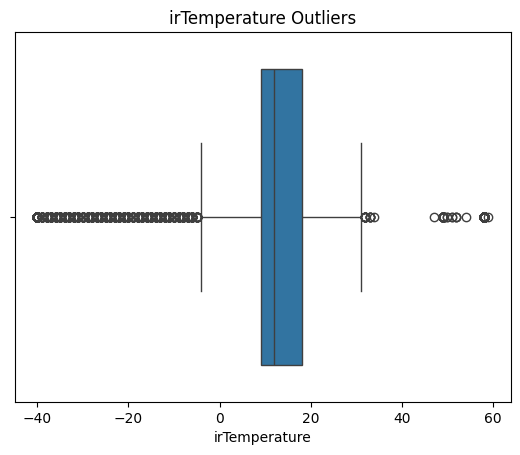

In [ ]:
 # Show irTemperature of leaves Outliers
sns.boxplot(x=df['irTemperature'])
plt.title('irTemperature Outliers')
plt.show()

In [ ]:
# Eliminating Outliers
# Calculate IQR for the 'irTemperature' column
Q1 = df['irTemperature'].quantile(0.25)
Q3 = df['irTemperature'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Capping -> change the outlier values to upper and lower limit values
df_clean_irTemp = df.copy()

df_clean_irTemp['irTemperature'] = df_clean_irTemp['irTemperature'].astype(float)
df_clean_irTemp.loc[(df_clean_irTemp['irTemperature']> upper_limit),'irTemperature'] = upper_limit
df_clean_irTemp.loc[(df_clean_irTemp['irTemperature']< lower_limit),'irTemperature'] = lower_limit

<Axes: ylabel='irTemperature'>

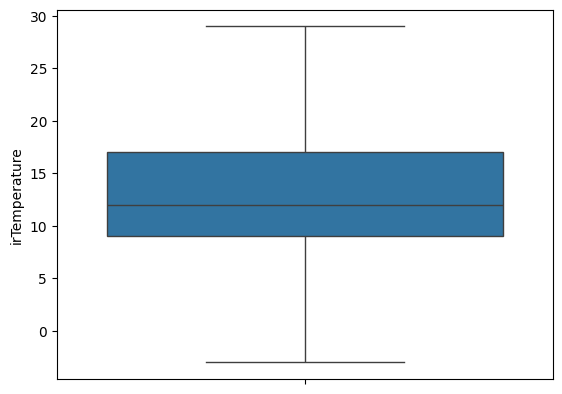

In [122]:
sns.boxplot(df_clean_irTemp['irTemperature'])

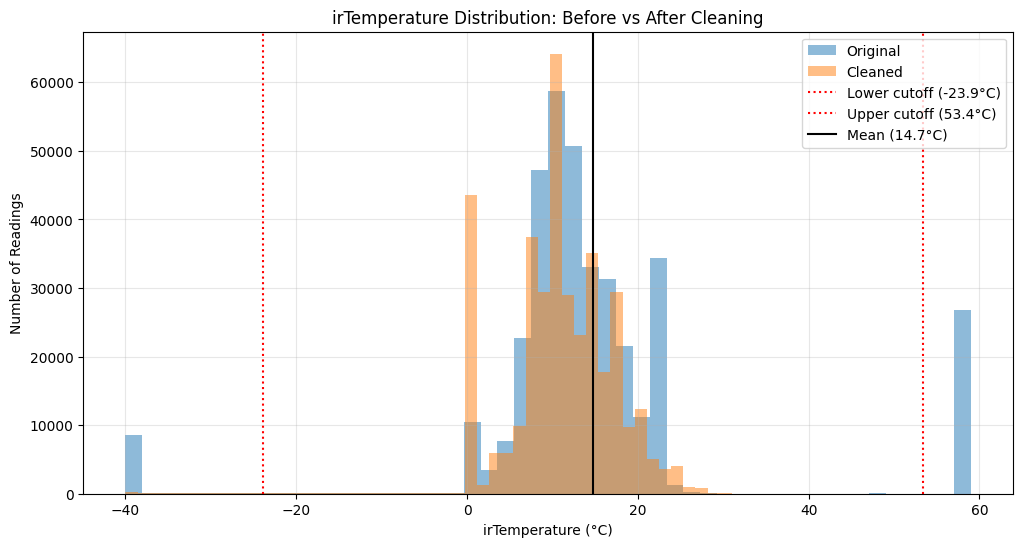

In [22]:
# irTemperature distribution chart showing results Before and after cleaning
plt.figure(figsize=(12,6))

# Calculate statistics
mean_temp = df['irTemperature'].mean()
std_temp = df['irTemperature'].std()
lower_cut = mean_temp - 2.5*std_temp
upper_cut = mean_temp + 2.5*std_temp

# Plot histograms graph
plt.hist(df['irTemperature'], bins=50, alpha=0.5, label='Original')
plt.hist(df_clean_irTemp['temperature'], bins=50, alpha=0.5, label='Cleaned')

# Adding reference lines
plt.axvline(lower_cut, color='red', linestyle=':', label=f'Lower cutoff ({lower_cut:.1f}°C)')
plt.axvline(upper_cut, color='red', linestyle=':', label=f'Upper cutoff ({upper_cut:.1f}°C)')
plt.axvline(mean_temp, color='black', linestyle='-', label=f'Mean ({mean_temp:.1f}°C)')

# Formatting
plt.xlabel('irTemperature (°C)')
plt.ylabel('Number of Readings')
plt.title('irTemperature Distribution: Before vs After Cleaning')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
print(df.columns) # columns contain Index(['DateTime', 'deviceId', 'humidity', 'temperature', 'irTemperature',  'zscore'], dtype='object')

Index(['DateTime', 'deviceId', 'humidity', 'temperature', 'irTemperature',
       'zscore'],
      dtype='object')


In [35]:
# Saving the cleaned data set
df_clean.to_csv('Cleaned_Greenhouse_Data.csv', index=False)

## Statistical analysis to understand data distribution

In [25]:
# Check for missing values in the dataset

df_clean.isnull().sum()


DateTime         0
deviceId         0
humidity         0
temperature      0
irTemperature    0
dtype: int64

In [26]:
# Summary statistics for numerical features
# This includes the mean, median, standard deviation, minimum, and maximum values for each feature.
df_clean.describe()


,DateTime,humidity,temperature,irTemperature
count,370710,370710.000000,370710.00000,370710.000000
mean,2023-10-20 05:45:34.953327616,70.225716,10.85333,14.721283
min,2023-02-16 13:41:57,0.000000,-40.00000,-40.000000
25%,2023-10-13 03:56:41.500000,69.000000,8.00000,9.000000
50%,2023-11-05 18:58:30,80.000000,11.00000,12.000000
75%,2023-11-28 11:22:05.249999872,86.000000,15.00000,18.000000
max,2023-12-22 09:25:57,100.000000,31.00000,59.000000
std,NaN,27.826309,6.50422,15.454793


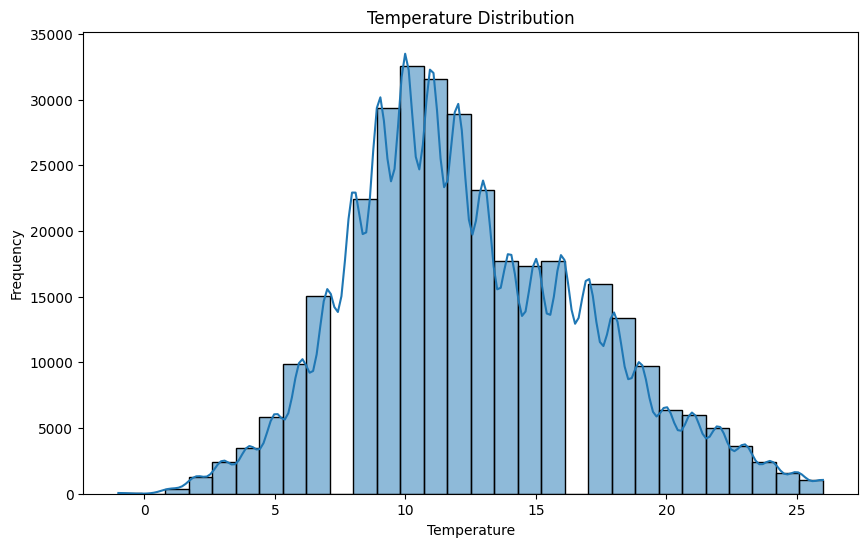

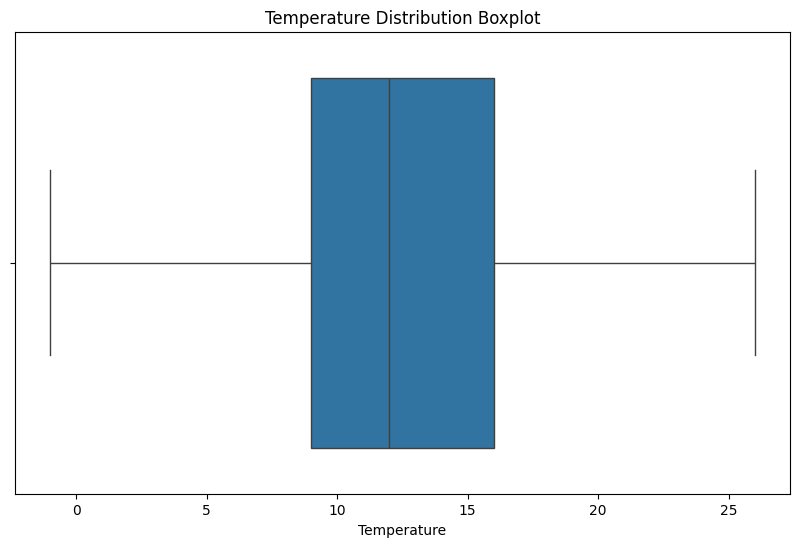

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Temperature Distribution in the greenhouse 
plt.figure(figsize=(10, 6))
sns.histplot(df_clean['temperature'], bins=30, kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Box plot of Temperature Distribution in the greenhouse
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean['temperature'])
plt.title('Temperature Distribution Boxplot')
plt.xlabel('Temperature')
plt.show()


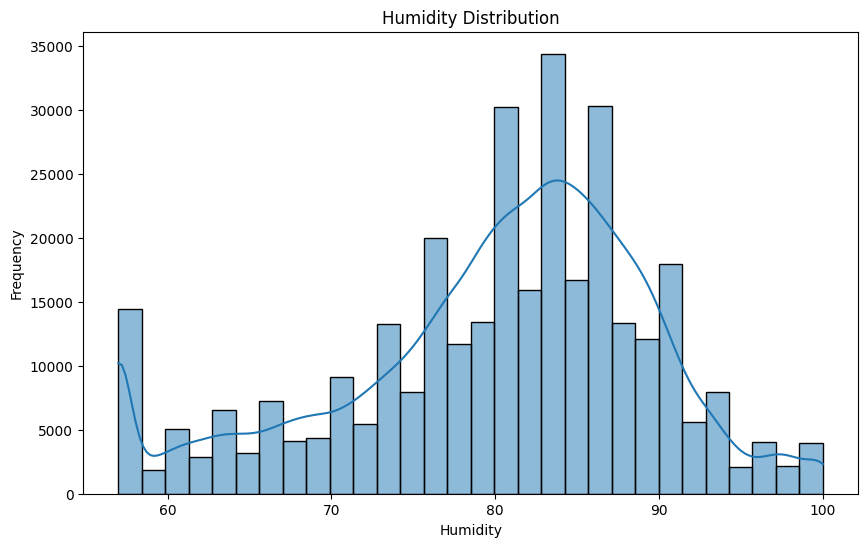

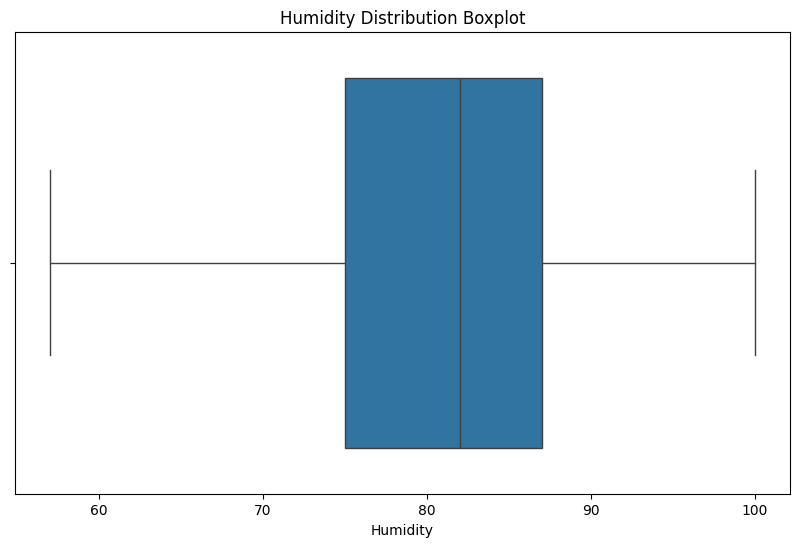

In [ ]:
# Humidity distribution plot
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of Humidity
plt.figure(figsize=(10, 6))
sns.histplot(df_clean_humidity['humidity'], bins=30, kde=True)
plt.title('Humidity Distribution')
plt.xlabel('Humidity')
plt.ylabel('Frequency')
plt.show()

# Box plot of Humidity
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean_humidity['humidity'])
plt.title('Humidity Distribution Boxplot')
plt.xlabel('Humidity')
plt.show()


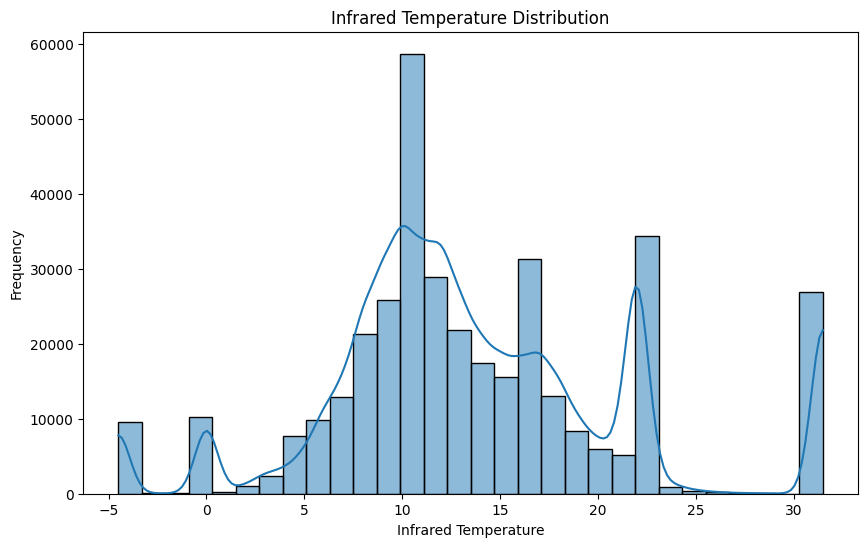

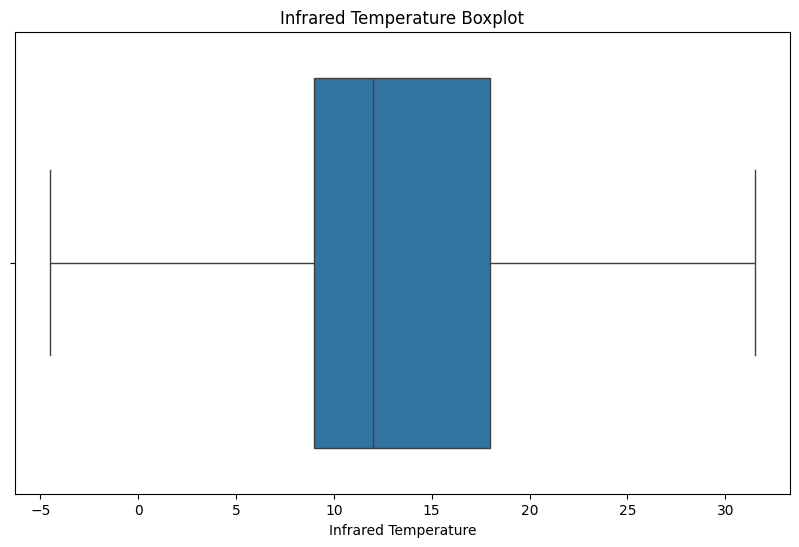

In [60]:
# irTemperature Distribution plot
# Histogram and KDE of irTemperature
plt.figure(figsize=(10, 6))
sns.histplot(df_clean_irTemp['irTemperature'], bins=30, kde=True)
plt.title('Infrared Temperature Distribution')
plt.xlabel('Infrared Temperature')
plt.ylabel('Frequency')
plt.show()

# Box plot of irTemperature
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean_irTemp['irTemperature'])
plt.title('Infrared Temperature Boxplot')
plt.xlabel('Infrared Temperature')
plt.show()


## Data Visualizations


In [ ]:
# Importing Libraries for Visualizations
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [39]:
# Loading the cleaned dataset
df_clean = pd.read_csv ('Cleaned_Greenhouse_Data.csv')

# Time Series Analysis
## - Trends Over time 

In [41]:
# Extracting useful components for time series analysis and creating new columns
df_clean['DateTime'] = pd.to_datetime(df['DateTime'])
df_clean['Date'] = df_clean['DateTime'].dt.date
df_clean['Time'] = df_clean['DateTime'].dt.time
df_clean['Hour'] = df_clean['DateTime'].dt.hour
df_clean['Month'] = df_clean['DateTime'].dt.month
df_clean['Weekday'] = df_clean['DateTime'].dt.day_name()
df_clean['Period'] = pd.cut(df_clean['Hour'], bins=[0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)



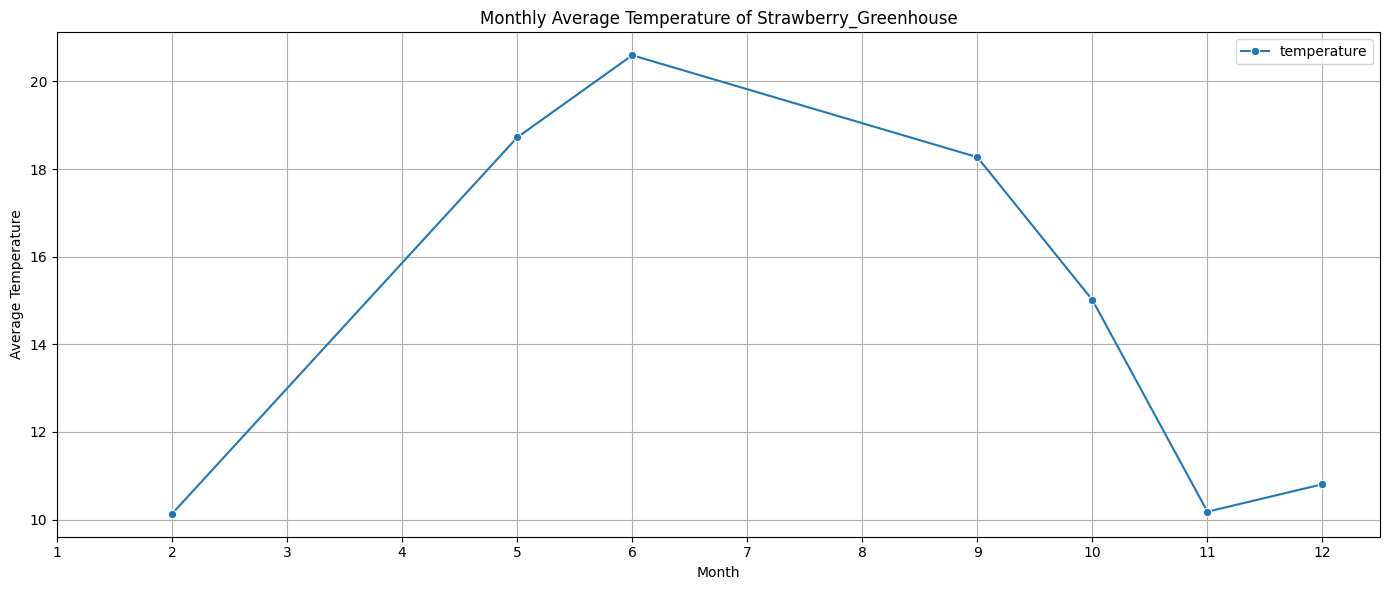

In [92]:
# Visualizing the Relationship between Temperature, humidity and irTempearature of the strawberry greenhouse (based on month)
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Month' and calculate monthly average temperature
Monthly_avg = df_clean.groupby('Month')[['temperature']].mean()

# Create the plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=Monthly_avg, marker='o', color='tab:orange')

# Title and axis labels
plt.title('Monthly Average Temperature of Strawberry_Greenhouse')
plt.xlabel('Month')
plt.ylabel('Average Temperature')

# Set x-axis to display month numbers
plt.xticks(ticks=range(1, 13))

# Show grid for better readability
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()



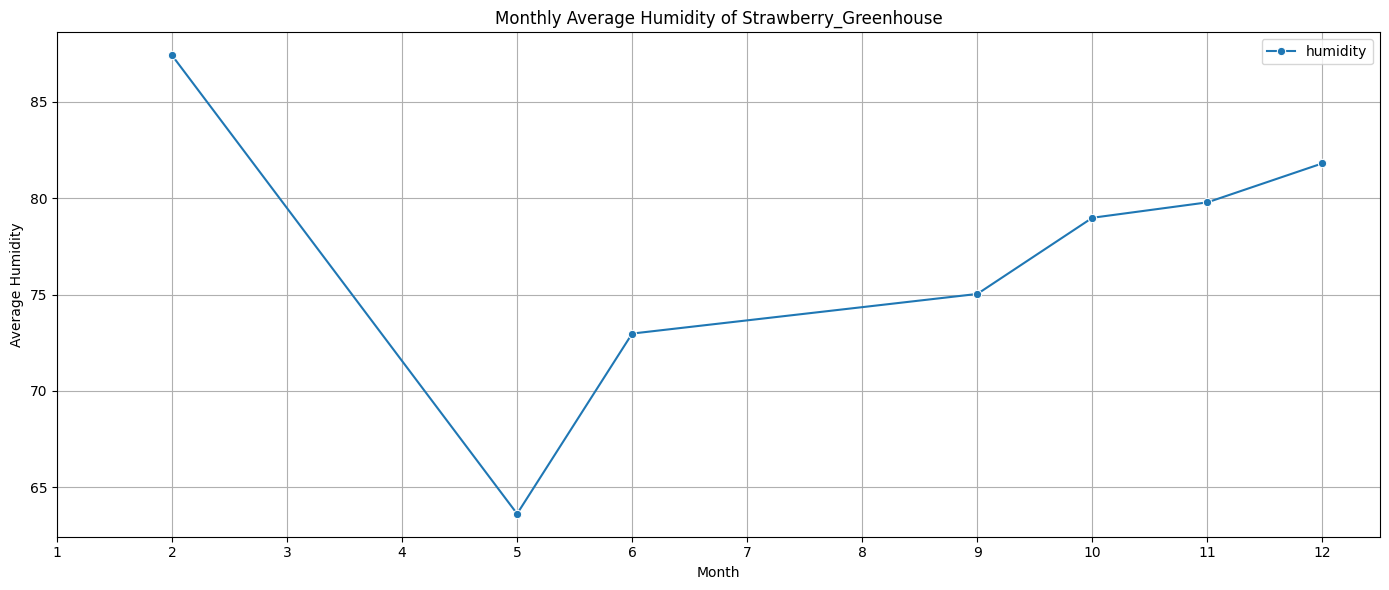

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

# Group by 'Month' and calculate monthly average humidity
Monthly_avg = df_clean.groupby('Month')[['humidity']].mean()

# Create the plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=Monthly_avg, marker='o', color='tab:blue')

# Title and axis labels
plt.title('Monthly Average Humidity of Strawberry_Greenhouse')
plt.xlabel('Month')
plt.ylabel('Average Humidity')

# Set x-axis to display month numbers
plt.xticks(ticks=range(1, 13))

# Show grid for better readability
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


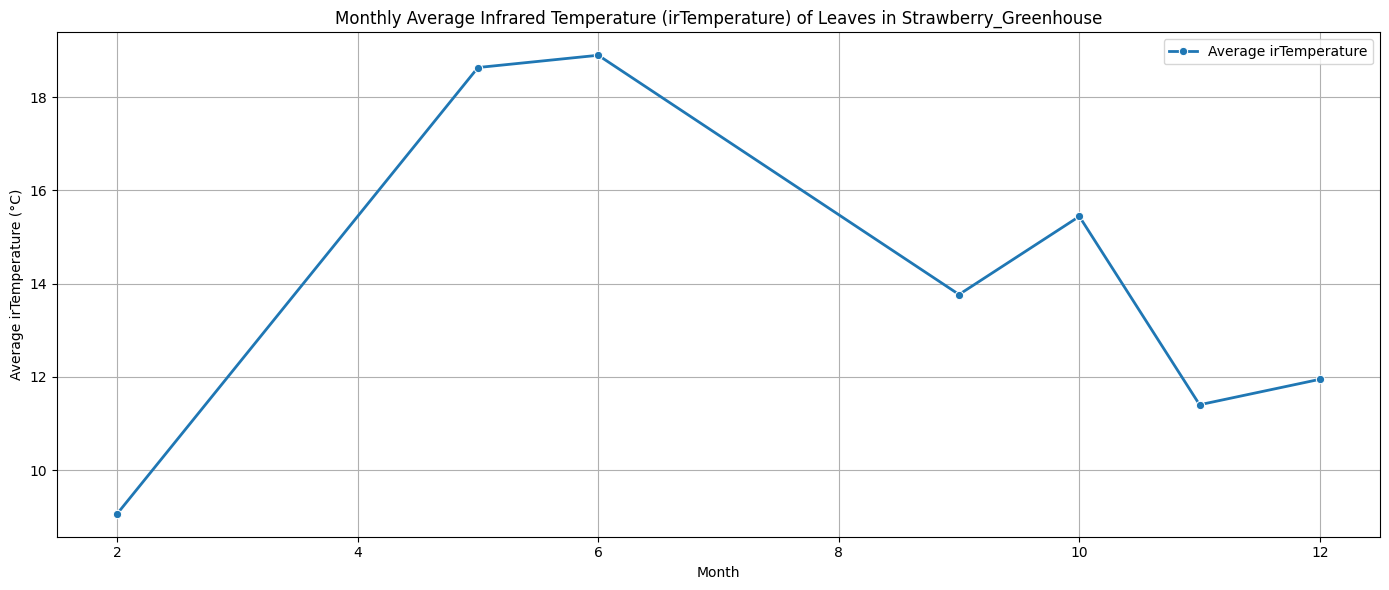

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Group by 'Month' and calculate the average irTemperature
Monthly_avg_irTemp = df_clean.groupby('Month')[['irTemperature']].mean()

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(
    x=Monthly_avg_irTemp.index,
    y=Monthly_avg_irTemp['irTemperature'],
    marker='o',
    linewidth=2,
    color='tab:blue',
    label='Average irTemperature'
)

# Title and axis labels
plt.title('Monthly Average Infrared Temperature (irTemperature) of Leaves in Strawberry_Greenhouse')
plt.xlabel('Month')
plt.ylabel('Average irTemperature (°C)')

# Grid and legend
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


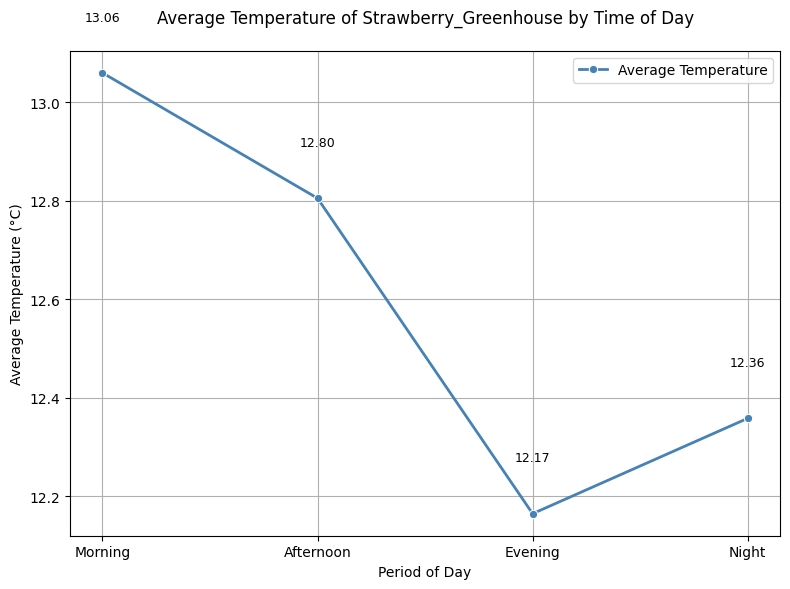

In [70]:
# What times of day (morning vs. afternoon vs. night) record the highest or lowest temperatures?
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure periods are in a logical order
ordered_periods = ['Morning', 'Afternoon', 'Evening', 'Night']
df_clean['Period'] = pd.Categorical(df_clean['Period'], categories=ordered_periods, ordered=True)

# Compute average temperature
period_avg_temp = df_clean.groupby('Period', observed=True)['temperature'].mean().reindex(ordered_periods)

# Plot
plt.figure(figsize=(8, 6))
sns.lineplot(
    x=period_avg_temp.index,
    y=period_avg_temp.values,
    marker='o',
    linewidth=2,
    color='steelblue',
    label='Average Temperature'
)

# Add data labels
for i, value in enumerate(period_avg_temp.values):
    plt.text(i, value + 0.1, f"{value:.2f}", ha='center', va='bottom', fontsize=9)

# Title and axis labels
plt.title('Average Temperature of Strawberry_Greenhouse by Time of Day', pad=20)
plt.xlabel('Period of Day')
plt.ylabel('Average Temperature (°C)')

# Grid and legend
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


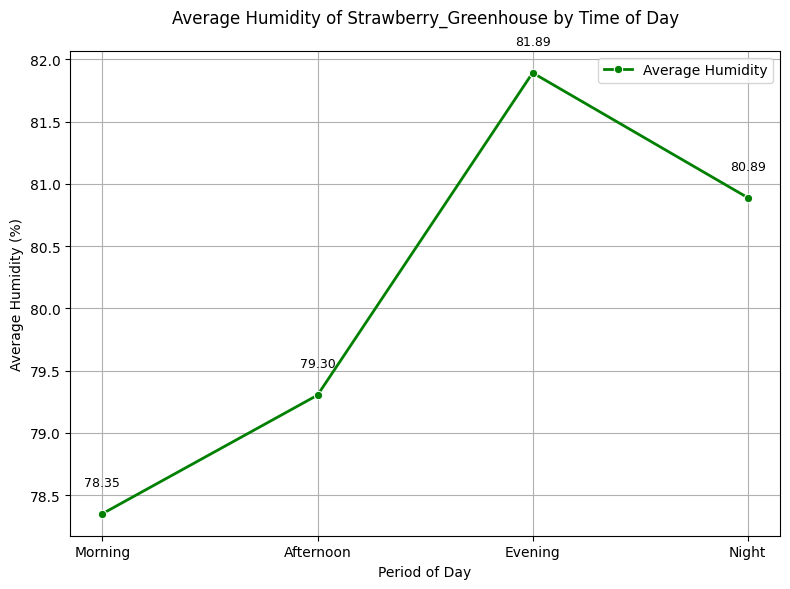

In [97]:
# What times of day (morning vs. afternoon vs. night) record the highest or lowest Humidity?
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Ensure periods are in a logical order
ordered_periods = ['Morning', 'Afternoon', 'Evening', 'Night']
df_clean['Period'] = pd.Categorical(df_clean['Period'], categories=ordered_periods, ordered=True)

# Compute average humidity by period
period_avg_humidity = df_clean.groupby('Period', observed=True)['humidity'].mean().reindex(ordered_periods)

# Plot
plt.figure(figsize=(8, 6))
sns.lineplot(
    x=period_avg_humidity.index,
    y=period_avg_humidity.values,
    marker='o',
    linewidth=2,
    color='green',
    label='Average Humidity'
)

# Add data labels
for i, value in enumerate(period_avg_humidity.values):
    plt.text(i, value + 0.2, f"{value:.2f}", ha='center', va='bottom', fontsize=9)

# Title and axis labels
plt.title('Average Humidity of Strawberry_Greenhouse by Time of Day', pad=20)
plt.xlabel('Period of Day')
plt.ylabel('Average Humidity (%)')

# Grid and legend
plt.grid(True)
plt.legend(loc='upper right')
plt.tight_layout()
plt.show()


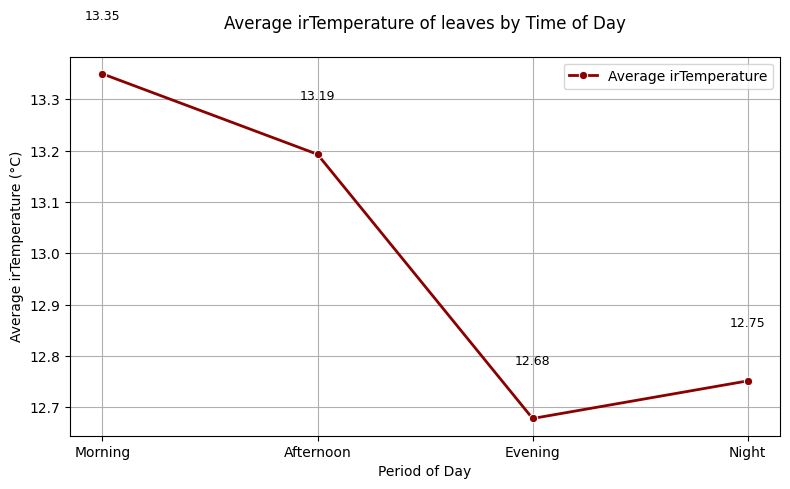

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ensure periods are ordered (e.g., Morning, Afternoon, Evening, Night)
ordered_periods = ['Morning', 'Afternoon', 'Evening', 'Night']
df_clean['Period'] = pd.Categorical(df_clean['Period'], categories=ordered_periods, ordered=True)

# Compute average irTemperature by period
period_avg_ir_temp = df_clean.groupby('Period', observed=True)['irTemperature'].mean().reindex(ordered_periods)

# Plot line chart
plt.figure(figsize=(8, 5))
sns.lineplot(
    x=period_avg_ir_temp.index,
    y=period_avg_ir_temp.values,
    marker='o',
    linewidth=2,
    color='darkred',
    label='Average irTemperature'
)

# Add data labels
for i, value in enumerate(period_avg_ir_temp.values):
    plt.text(i, value + 0.1, f"{value:.2f}", ha='center', va='bottom', fontsize=9)

# Styling
plt.title('Average irTemperature of leaves by Time of Day', pad=20)
plt.xlabel('Period of Day')
plt.ylabel('Average irTemperature (°C)')
plt.legend(loc='upper right') 
plt.grid(True)
plt.tight_layout()
plt.show()

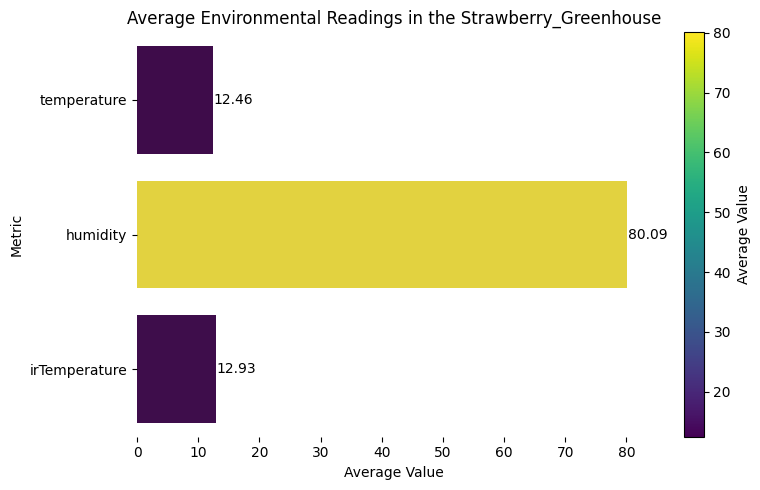

In [ ]:
# What is the average temperature, humidity, and irTemperature across the greenhouse?
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate averages
avg_values = df_clean[['temperature', 'humidity', 'irTemperature']].mean()

# Color mapping
norm = plt.Normalize(avg_values.min(), avg_values.max())
colors = plt.cm.viridis(norm(avg_values.values)).tolist()  

# Create the horizontal bar plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = sns.barplot(
    y=avg_values.index, 
    x=avg_values.values,  
    hue=avg_values.index,  
    palette=colors,       
    dodge=False,          
    ax=ax,
    legend=False          
)

# Add data labels
for i, v in enumerate(avg_values.values):
    ax.text(v + 0.1, i, f"{v:.2f}", color='black', va='center')

# Add colorbar to show scale
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([]) 
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Average Value')

# Titles and labels
ax.set_title('Average Environmental Readings in the Strawberry_Greenhouse')
ax.set_xlabel('Average Value')
ax.set_ylabel('Metric')

# Clean up the plot
for spine in ax.spines.values():
    spine.set_visible(False) 

plt.tight_layout()
plt.show()


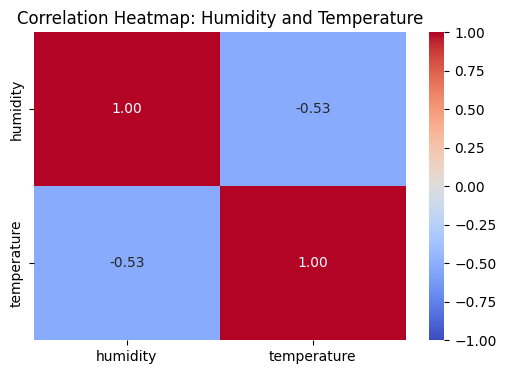

In [ ]:
# Correlation Heatmap between humidity and temperature
import seaborn as sns

# Compute the correlation matrix
corr_matrix = df_clean[['humidity', 'temperature']].corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1, cbar=True)
plt.title('Correlation Heatmap: Humidity and Temperature')
plt.show()


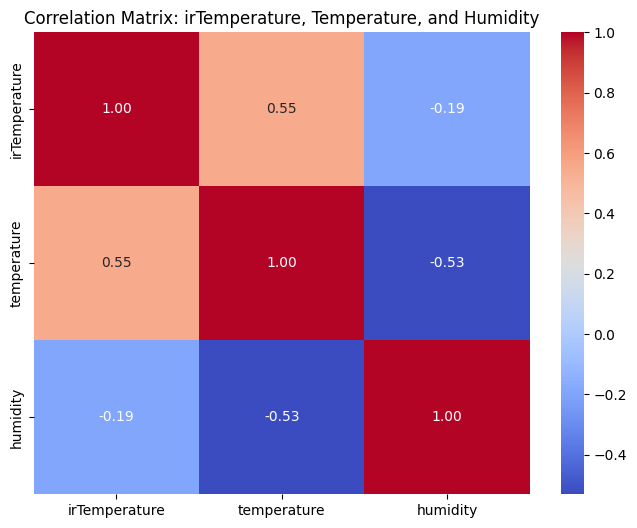

In [100]:
# Calculate the correlation matrix for irTemperature, Temperature, and Humidity
correlation_matrix = df_clean[['irTemperature', 'temperature', 'humidity']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix: irTemperature, Temperature, and Humidity')
plt.show()
